In [ ]:
from google.colab import drive
drive.mount('/content/drive')

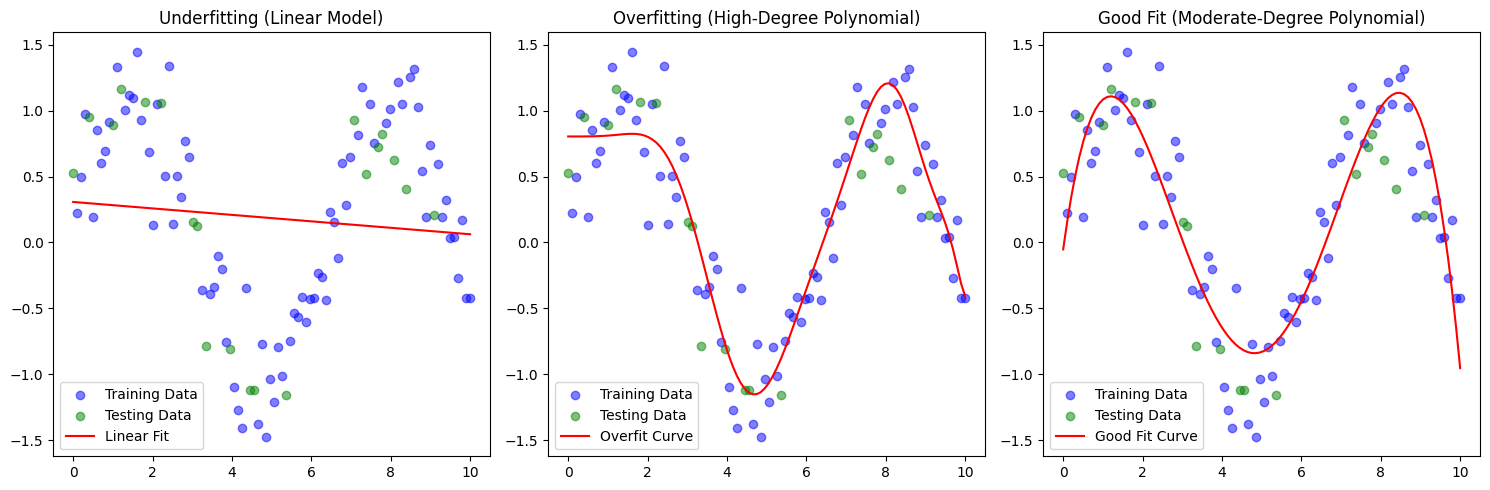

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate a synthetic dataset
# X: Input features, y: Target values with added noise
np.random.seed(0)  # Set random seed for reproducibility
X = np.linspace(0, 10, 100).reshape(-1, 1)  # Create 100 evenly spaced points between 0 and 10
y = np.sin(X).ravel() + np.random.normal(0, 0.3, X.shape[0])  # Sine wave with random noise

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a figure with 3 subplots for the three scenarios
plt.figure(figsize=(15, 5))

# ---- UNDERFITTING ----
# Fit a simple linear model (straight line)
linear_model = LinearRegression()  # Initialize the linear regression model
linear_model.fit(X_train, y_train)  # Train the model on the training data
plt.subplot(1, 3, 1)  # Create the first subplot
plt.scatter(X_train, y_train, label="Training Data", color="blue", alpha=0.5)  # Plot training data
plt.scatter(X_test, y_test, label="Testing Data", color="green", alpha=0.5)  # Plot testing data
plt.plot(X, linear_model.predict(X), label="Linear Fit", color="red")  # Plot the model's predictions
plt.title("Underfitting (Linear Model)")  # Add a title for this subplot
plt.legend()  # Add a legend

# ---- OVERFITTING ----
# Fit a high-degree polynomial model (degree 15)
poly_features = PolynomialFeatures(degree=15)  # Create polynomial features of degree 15
X_train_poly = poly_features.fit_transform(X_train)  # Transform the training data
X_test_poly = poly_features.transform(X_test)  # Transform the testing data
poly_model = LinearRegression()  # Initialize a new linear regression model
poly_model.fit(X_train_poly, y_train)  # Train the model on the transformed training data
plt.subplot(1, 3, 2)  # Create the second subplot
plt.scatter(X_train, y_train, label="Training Data", color="blue", alpha=0.5)  # Plot training data
plt.scatter(X_test, y_test, label="Testing Data", color="green", alpha=0.5)  # Plot testing data
plt.plot(X, poly_model.predict(poly_features.transform(X)), label="Overfit Curve", color="red")  # Plot predictions
plt.title("Overfitting (High-Degree Polynomial)")  # Add a title for this subplot
plt.legend()  # Add a legend

# ---- GOOD FIT ----
# Fit a moderate-degree polynomial model (degree 4)
poly_features_good = PolynomialFeatures(degree=4)  # Create polynomial features of degree 4
X_train_poly_good = poly_features_good.fit_transform(X_train)  # Transform the training data
X_test_poly_good = poly_features_good.transform(X_test)  # Transform the testing data
poly_model_good = LinearRegression()  # Initialize a new linear regression model
poly_model_good.fit(X_train_poly_good, y_train)  # Train the model on the transformed training data
plt.subplot(1, 3, 3)  # Create the third subplot
plt.scatter(X_train, y_train, label="Training Data", color="blue", alpha=0.5)  # Plot training data
plt.scatter(X_test, y_test, label="Testing Data", color="green", alpha=0.5)  # Plot testing data
plt.plot(X, poly_model_good.predict(poly_features_good.transform(X)), label="Good Fit Curve", color="red")  # Plot predictions
plt.title("Good Fit (Moderate-Degree Polynomial)")  # Add a title for this subplot
plt.legend()  # Add a legend

# Adjust the layout and save the plot
plt.tight_layout()  # Adjust subplot spacing for better visuals
plt.savefig("/content/sample_data/Overfitting_vs_Underfitting.png")  # Save the figure as an image
plt.show()  # Display the figure
